In [1]:
import requests
import json
import numpy as np
import os
import cv2
from PIL import Image

In [2]:
from ultralytics import YOLO
from ultralyticsplus import render_result

In [3]:
def load_image_from_url(url):
    response = requests.get(url, stream=True)
    if response.status_code == 200:
        with open('image.jpg', 'wb') as f:
            for chunk in response.iter_content(chunk_size=1024):
                f.write(chunk)

        # Load the image from the file
        image = cv2.imread('image.jpg')

        # Remove the temporary image file
        os.remove('image.jpg')

        return image
    else:
        print('Error loading image:', response.status_code)
        return None

image_url = 'https://img.favcars.com/dodge/mixed/dodge_mixed__pictures_1_640x480.jpg'
image = load_image_from_url(image_url)

Ultralytics YOLOv8.0.43  Python-3.11.5 torch-2.1.1+cpu CPU
YOLOv8s summary (fused): 168 layers, 11156544 parameters, 0 gradients, 28.6 GFLOPs

0: 480x640 3 cars, 317.6ms
Speed: 9.6ms preprocess, 317.6ms inference, 11.5ms postprocess per image at shape (1, 3, 640, 640)


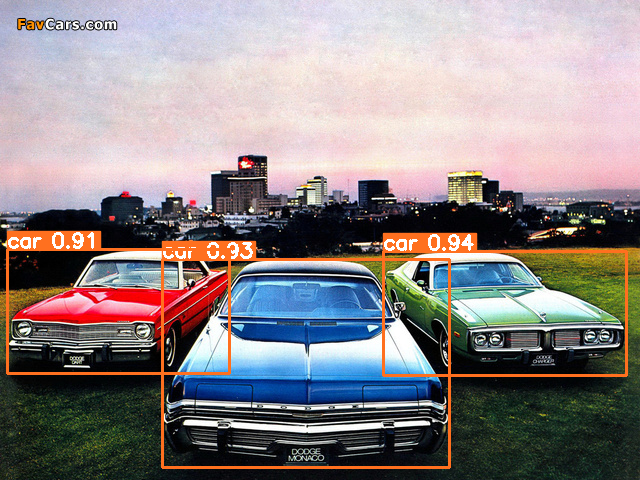

In [4]:
model = YOLO('yolov8s.pt')  # Load an official model
results = model(image)
render_result(model=model, image=image_url, result=results[0])